# Within-SH segment class analysis
Here, we compare labelled predictors to the projection to determine the extent to which they can describe distribution of data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

In [2]:
import avgn

In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir, FIGURE_DIR
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig

In [4]:
from scipy.stats import kruskal

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [6]:
DATASET_ID = "git_repos"

In [7]:
DT_ID = '2022-03-04_18-41-29'

In [8]:
seg_df = pd.read_pickle(DATA_DIR / DATASET_ID / 'SH' /  'SH.pickle')
seg_df[:3]

,start_time,end_time,ID,labels,indv,indvi,filename,group,location,sex,...,umap,combi_lab_simp,call_lab_simp,call_label,seg_pos_call,call_unique_num,combi_label,seg_pos_combi,call_pos_combi,combi_unique_num
1,0.786865,0.835165,1,SH,MGGY,0,BWY MGGY Call Combo 1 290719 PM,BWYa,CRAWLEY,F,...,"[11.71297, 4.7612605]",DS-SH-DS SH-LH,DS-SH-DS,DSSHDS,1,0,DSSHDS SHSHLH,1,0,0
3,0.932017,0.942875,3,SH,MGGY,0,BWY MGGY Call Combo 1 290719 PM,BWYa,CRAWLEY,F,...,"[9.690535, 5.1511226]",DS-SH-DS SH-LH,SH-LH,SHSHLH,0,1,DSSHDS SHSHLH,3,1,0
4,0.951561,0.980101,4,SH,MGGY,0,BWY MGGY Call Combo 1 290719 PM,BWYa,CRAWLEY,F,...,"[10.028099, 5.318019]",DS-SH-DS SH-LH,SH-LH,SHSHLH,1,1,DSSHDS SHSHLH,4,1,0


In [9]:
seg_df.sort_values(by=['ID'], inplace=True)

### Spectrograms for all individuals

In [10]:
def norm(x):
    return (x-np.min(x)) / (np.max(x) - np.min(x))

In [11]:
seg_df = seg_df[np.array([np.sum(i) > 0.0 for i in seg_df.specs.values])
]

In [12]:
specs = list(seg_df.specs.values)
specs = [norm(i) for i in tqdm(specs)]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

  0%|          | 0/489 [00:00<?, ?it/s]

(489, 4096)

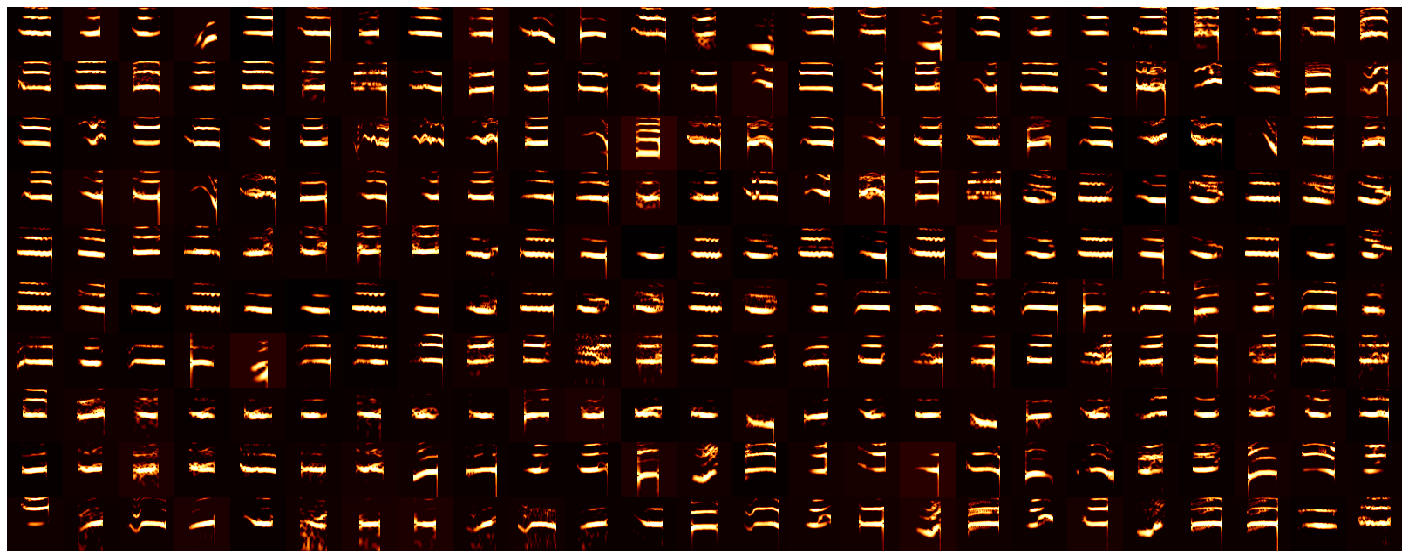

In [13]:
draw_spec_set(specs, zoom=1, maxrows=10, colsize=25)

In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(15, 15),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.indv.values,
        'alpha':1,
        's': 5,
        'show_legend': True,
        "color_palette": 'inferno',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);


In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(15, 15),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.group.values,
        'alpha':1,
        's': 5,
        'show_legend': True,
        "color_palette": 'deep',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.location.values,
        'alpha':1,
        's': 5,
        'show_legend': True,
        "color_palette": 'tab20',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.sex.values,
        'alpha':1,
        's': 5,
        'show_legend': True,
        "color_palette": 'Greens',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(15, 15),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.call_label.values,
        'alpha':1,
        's': 5,
        'show_legend': True,
        "color_palette": 'tab20',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.seg_pos_call.values,
        'alpha':1,
        's': 5,
        'show_legend': True,
        "color_palette": 'Reds',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(15, 15),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.call_lab_simp.values,
        'alpha':1,
        's': 8,
        'show_legend': True,
        "color_palette": 'tab20',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

### Create new variable

Creating a new variable to describe two categories of SH segment:
- those that solely comprise the call-level vocal unit or that are combined with DS (and not LH or NL)
- those within a call containing a LH segment
- those within a call containing a NL segment

In [36]:
## create a new column of copied call label data so that I can modify
seg_df['simp'] = seg_df['call_lab_simp']

In [37]:
list(seg_df.simp.unique())

['DS-SH-DS',
 'SH-LH',
 'NL-SH-DS',
 'SH-DS',
 'SH-DS-SH-DS',
 'NL-DS-SH-DS',
 'SH-DS-SH-LH',
 'SH-DS-LH',
 'SH-LH-DS',
 'SH-NL-DS',
 'DS-SH-DS-SH-LH',
 'SH-DS-SH',
 'SH']

In [39]:
#1 = SH or SH & DS
#2 = contains LH
#3 = contains NL

In [39]:
## Create conditions for all labels containing repeated segments (these will be simplified in the next step)
cond1 = seg_df['simp'] == 'DS-SH-DS'
cond2 = seg_df['simp'] == 'SH-LH'
cond3 = seg_df['simp'] == 'NL-SH-DS'
cond4 = seg_df['simp'] == 'SH-DS-SH-DS'
cond5 = seg_df['simp'] == 'SH-DS'
cond6 = seg_df['simp'] == 'NL-DS-SH-DS'
cond7 = seg_df['simp'] == 'SH-DS-SH-LH'
cond8 = seg_df['simp'] == 'SH-DS-LH'
cond9 = seg_df['simp'] == 'SH-NL-DS'
cond10 = seg_df['simp'] == 'SH-DS-SH'
cond11 = seg_df['simp'] == 'SH'
cond12 = seg_df['simp'] == 'SH-LH-DS'
cond13 = seg_df['simp'] == 'DS-SH-DS-SH-LH'

In [40]:
### Simplify
seg_df.loc[cond1, 'simp'] = 'SH Lone/Comb DS'
seg_df.loc[cond2, 'simp'] = 'In call w LH'
seg_df.loc[cond3, 'simp'] = 'In call w NL'
seg_df.loc[cond4, 'simp'] = 'SH Lone/Comb DS'
seg_df.loc[cond5, 'simp'] = 'SH Lone/Comb DS'
seg_df.loc[cond6, 'simp'] = 'NL-DS-SH-DS'
seg_df.loc[cond7, 'simp'] = 'In call w LH'
seg_df.loc[cond8, 'simp'] = 'In call w LH'
seg_df.loc[cond9, 'simp'] = 'NL-DS-SH-DS'
seg_df.loc[cond10, 'simp'] = 'SH Lone/Comb DS'
seg_df.loc[cond11, 'simp'] = 'SH Lone/Comb DS'
seg_df.loc[cond12, 'simp'] = 'In call w LH'
seg_df.loc[cond13, 'simp'] = 'In call w LH'

In [ ]:
nex = -1
scatter_spec(
    np.array(list(seg_df['umap'].values)),
    specs,
    column_size=12,
    x_range = [3,15],
    y_range = [0.5,12.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.simp.values,
        'alpha':1,
        's': 5,
        'show_legend': True,
        "color_palette": 'magma',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

In [43]:
indvscore = silhouette_score(list(np.array(list(seg_df['umap'].values))), labels = seg_df.indv.values)
groupscore = silhouette_score(list(np.array(list(seg_df['umap'].values))), labels = seg_df.group.values)
locscore = silhouette_score(list(np.array(list(seg_df['umap'].values))), labels = seg_df.location.values)
sexscore = silhouette_score(list(np.array(list(seg_df['umap'].values))), labels = seg_df.sex.values)
callscore = silhouette_score(list(np.array(list(seg_df['umap'].values))), labels = seg_df.call_lab_simp.values)
posscore = silhouette_score(list(np.array(list(seg_df['umap'].values))), labels = seg_df.seg_pos_call.values)
simpScore = silhouette_score(list(np.array(list(seg_df['umap'].values))), labels = seg_df.simp.values)

In [44]:
segmentdata = {'Test Result': ['S'], 'Indv': [indvscore], 'Group':[groupscore], 'Study Site':[locscore], 
               'Sex':[sexscore], 'Call Label':[callscore], 'Segment Pos': [posscore], 'Simp':[simpScore]}
df = pd.DataFrame(segmentdata)

In [ ]:
df

In [46]:
samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = seg_df.indv.values)
chance_samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = np.random.permutation(seg_df.indv.values))

In [ ]:
KWindv = kruskal(samples, chance_samples)
KWindv

In [48]:
samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = seg_df.group.values)
chance_samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = np.random.permutation(seg_df.group.values))

In [ ]:
KWgroup = kruskal(samples, chance_samples)
KWgroup

In [54]:
samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = seg_df.location.values)
chance_samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = np.random.permutation(seg_df.location.values))

In [ ]:
KWloc = kruskal(samples, chance_samples)
KWloc

In [59]:
samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = seg_df.sex.values)
chance_samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = np.random.permutation(seg_df.sex.values))

In [60]:
KWsex = kruskal(samples, chance_samples)
KWsex

KruskalResult(statistic=98.8050457092254, pvalue=2.786236609219039e-23)

In [65]:
samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = seg_df.call_lab_simp.values)
chance_samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = np.random.permutation(seg_df.call_lab_simp.values))

In [ ]:
KWcall = kruskal(samples, chance_samples)
KWcall

In [67]:
samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = seg_df.seg_pos_call.values)
chance_samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = np.random.permutation(seg_df.seg_pos_call.values))

In [ ]:
KWpos = kruskal(samples, chance_samples)
KWpos

In [72]:
samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = seg_df.simp.values)
chance_samples = silhouette_samples(list(np.array(list(seg_df['umap'].values))), labels = np.random.permutation(seg_df.simp.values))

In [ ]:
KWsimp = kruskal(samples, chance_samples)
KWsimp

In [77]:
#save df
save_loc = DATA_DIR / DATASET_ID / 'SH' /  'SH.pickle'
ensure_dir(save_loc.as_posix())
seg_df.to_pickle(save_loc)